<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Connor_Heraty_LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [1]:
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [2]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=25.4259792842023, pvalue=3.011748827520833e-06)


In [3]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

Candidate topics to explore:

- `scipy.stats.chi2` - the Chi-squared distribution, which we can use to reproduce the Chi-squared test
- Calculate the Chi-Squared test statistic "by hand" (with code), and feed it into `chi2`
- Build a confidence interval with `stats.t.ppf`, the t-distribution percentile point function (the inverse of the CDF) - we can write a function to return a tuple of `(mean, lower bound, upper bound)` that you can then use for the assignment (visualizing confidence intervals)

In [4]:
# Taking requests! Come to lecture with a topic or problem and we'll try it.

gender = ['male', 'male', 'male', 'female', 'female', 'female']
eats_outside = ['outside', 'inside', 'inside', 'inside', 'outside', 'outside']

import pandas as pd

df = pd.DataFrame({"gender": gender, "preference": eats_outside})
df.head(6)

,gender,preference
0,male,outside
1,male,inside
2,male,inside
3,female,inside
4,female,outside
5,female,outside


In [5]:
ct = pd.crosstab(df.gender, df.preference, margins=True)
ct

preference,inside,outside,All
gender,,,
female,1,2,3
male,2,1,3
All,3,3,6


In [6]:
df = df.replace("male", 0)
df = df.replace("female", 1)
df = df.replace("outside", 0)
df = df.replace("inside", 1)

df

,gender,preference
0,0,0
1,0,1
2,0,1
3,1,1
4,1,0
5,1,0


In [7]:
ct = pd.crosstab(df.gender, df.preference, margins=True)

expected = np.array([[1.5, 1.5],
            [1.5, 1.5]])

# Marginal Proportion of the first row
# obs / total = (3 males) / (6 humans)

pd.crosstab(df.gender, df.preference, margins=True, normalize='all')

# observed is a table of the marginal proportions of each subgroup
observed = np.array([[.5,.5], [.5,.5]])

deviation = numerator = observed - expected
print(deviation)

deviation_squared = deviation**2

print("deviation squared \n", deviation_squared)

fraction = (deviation_squared / expected)
print("fraction: \n", fraction)

chi2 = fraction.sum()
print(chi2 / 4)

[[-1. -1.]
 [-1. -1.]]
deviation squared 
 [[1. 1.]
 [1. 1.]]
fraction: 
 [[0.66666667 0.66666667]
 [0.66666667 0.66666667]]
0.6666666666666666


In [8]:
chi_data = [[1,2],[2,1]]

from scipy.stats import chisquare  # One-way chi squared test

chisquare(chi_data, axis=None)

Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)

In [9]:
from scipy.stats import chi2_contingency

table = [[1,2],[2,4]]

chi2statistic, pvalue, dof, observed = chi2_contingency(table)

print("chi2 stat", chi2statistic)
print("p-value", pvalue)
print("degrees of freedom", dof)
print("Contingency Table: \n", observed)

chi2 stat 0.0
p-value 1.0
degrees of freedom 1
Contingency Table: 
 [[1. 2.]
 [2. 4.]]


In [0]:
def lazy_chisquare(obsered, expected):
  chisquare = 0
  for row_obs, row_exp in zip(observed, expected):
    for obs, exp in zip(row_obs, row_exp):
      chisquare += (obs - exp) **2 / exp
  return chisquare

In [11]:
chi_data = [[1, 2], [2, 1]]
expected_values = [[1.5, 1.5], [1.5, 1.5]]
chistat = lazy_chisquare(chi_data, expected_values)
chistat

4.666666666666667

In [0]:
# Confidence intervals!
# Similar to hypothesis testing, but centered at sample mean
# Generally better than reporting the "point estimate" (sample mean)
# Why? Because point estimates aren't always perfect

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence.
  
  Arguments:
  data - iterable (list or numpy array) of sample observations
  confidence - level of confidence for the interval
  
  Returns:
  tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1) 
  return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "our mean lies in the interval [{:.2},{:.2}]".format(
    confidence_interval[1], confidence_interval[2])
  return s

In [13]:
# Confidence_interval = [lower_bound, upper_bound]

coinflips = np.random.binomial(n=1, p=.5, size=100)
print(coinflips)

[0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1]


In [14]:
import scipy.stats as stats
stats.ttest_1samp(coinflips, 0.5)

Ttest_1sampResult(statistic=2.0310096011589893, pvalue=0.044934725212630505)

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Importing the Data

In [15]:
from google.colab import files
uploaded = files.upload()

Saving house-votes-84.txt to house-votes-84 (1).txt


## Data Cleaning

In [0]:
df = pd.read_csv('house-votes-84.txt', sep=",", header=None)

In [0]:
# Rename column titles to those specified by data source
df = df.rename({0: 'Class Name',
            1: 'handicapped-infants',
            2: 'water-project-cost-sharing',
            3: 'adoption-of-the-budget-resolution',
            4: 'physician-fee-freeze',
            5: 'el-salvador-aid',
            6: 'religious-groups-in-schools',
            7: 'anti-satellite-test-ban',
            8: 'aid-to-nicaraguan-contras',
            9: 'mx-missile',
            10: 'immigration',
            11: 'synfuels-corporation-cutback',
            12: 'education-spending',
            13: 'superfund-right-to-sue',
            14: 'crime',
            15: 'duty-free-exports',
            16: 'export-administration-act-south-africa'},
           axis=1)

In [0]:
# Replace '?' with NaN values for further analysis
import numpy as np
df = df.replace('?', np.NaN)

In [0]:
df = df.replace({'n':0, 'y':1})

In [0]:
# Create seperate dataframes for republican/democrat
df_rep = df.loc[df["Class Name"] == 'republican']
df_dem = df.loc[df["Class Name"] == 'democrat']

## Assignment Question #1

In [47]:
# Confidence interval for the water project cost sharing issue
confidence_interval(df['handicapped-infants'].dropna())

(0.44208037825059104, 0.39456046308364673, 0.48960029341753536)

## Assignment Question #2


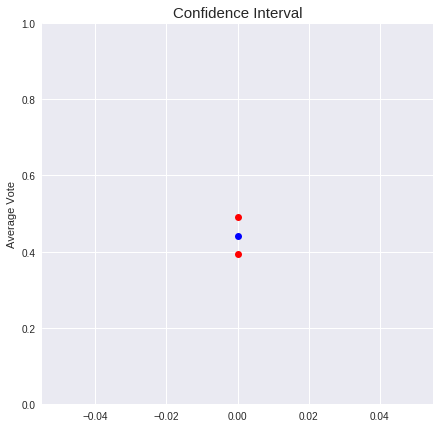

In [48]:
# Basic plot visualizing the mean (blue) and confidence interval (red)
_plot_(confidence_interval(df['handicapped-infants'].dropna()))

## Assignment Question #3

We can infer from the above data points that we can predict with 95% confidence that between 39.45% and 48.96% of congress will vote in favor of the 'handicapped-infants' legislation. This suggests that it is highly unlikely that this legislation will pass in congress. 

## Globals


In [0]:
issues = ['handicapped-infants',
          'water-project-cost-sharing',
          'adoption-of-the-budget-resolution',
          'physician-fee-freeze',
          'el-salvador-aid',
          'religious-groups-in-schools',
          'anti-satellite-test-ban',
          'aid-to-nicaraguan-contras',
          'mx-missile',
          'immigration',
          'synfuels-corporation-cutback',
          'education-spending',
          'superfund-right-to-sue',
          'crime',
          'duty-free-exports',
          'export-administration-act-south-africa']

## Functions

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence.
  
  Arguments:
  data - iterable (list or numpy array) of sample observations
  confidence - level of confidence for the interval
  
  Returns:
  tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1) 
  return (mean, mean - interval, mean + interval)

In [0]:
def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "We can predict with 95% confidence that the average vote lies within [{:.2},{:.2}]".format(
    confidence_interval[1], confidence_interval[2])
  return s

In [0]:
def probability_passing(confidence_interval):
  
  if confidence_interval[2] < .5:
    print("It is highly unlikely this legislation will pass!")
    
  elif confidence_interval[1] > .5:
    print("It is highly likely this legislation will pass!")
    
  elif (confidence_interval[2] and confidence_interval[0]) > .5:
    print("It is more likely than not this legislation will pass!")
    
  else: #(confidence_interval[1] & confidence_interval[0]) < .5:
    print("It is more likely than not this legislation will not pass!")
    
  

In [0]:
def _plot_(confidence_interval):
  """
  Return a plot depicting the mean(blue) and confidence intervals(red)
  
  Arguments:
  Output of the function confidence_interval
  
  Returns:
  Matplotlib plot of the mean and confidence intervals
  """
  
  plt.style.use('fivethirtyeight')
  
  plt.figure(figsize=(7,7))
  
  plt.plot(confidence_interval[0], color='b', marker='o')
  plt.plot(confidence_interval[1], color='r', marker='o')
  plt.plot(confidence_interval[2], color='r', marker='o')
  
  
  plt.title("Confidence Interval", size=15)
  plt.ylabel("Average Vote")
  
  plt.ylim(0,1)
  

In [0]:
def __main__():
  
  issue = input('Choose an issue from the list: ')
  ask = input("Please Choose One: Confidence interval for Republican, Democrat, or All - You've chosen ").lower()
  
  if ask == 'republican':
    issue_clean = df_rep[issue].dropna()
    _plot_(confidence_interval(issue_clean))
    print(report_confidence_interval(confidence_interval(issue_clean)))   

  elif ask == 'democrat':
    issue_clean = df_dem[issue].dropna()
    _plot_(confidence_interval(issue_clean))
    print(report_confidence_interval(confidence_interval(issue_clean)))

  else:
    issue_clean = df[issue].dropna()
    _plot_(confidence_interval(issue_clean))
    print(report_confidence_interval(confidence_interval(issue_clean)))
    probability_passing(confidence_interval(issue_clean))

## Stretch Goal

Refactored function that returns custom information and plot based upon information from the user!

**Issues**

- handicapped-infants
- water-project-cost-sharing
- adoption-of-the-budget-resolution
- physician-fee-freeze
- el-salvador-aid
- religious-groups-in-schools
- anti-satellite-test-ban
- aid-to-nicaraguan-contras
- mx-missile
- immigration
- synfuels-corporation-cutback
- education-spending
- superfund-right-to-sue
- crime
- duty-free-exports
- export-administration-act-south-africa

Choose an issue from the list: education-spending
Please Choose One: Confidence interval for Republican, Democrat, or All - You've chosen All
We can predict with 95% confidence that the average vote lies within [0.37,0.47]
It is highly unlikely this legislation will pass!


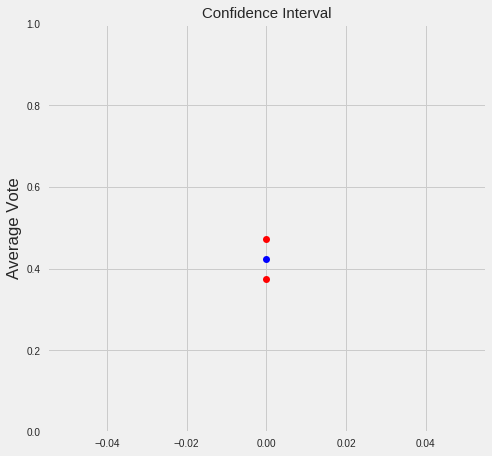

In [73]:
__main__()

## Not Finished Yet

In [36]:
issues = ['handicapped-infants',
          'water-project-cost-sharing',
          'adoption-of-the-budget-resolution',
          'physician-fee-freeze',
          'el-salvador-aid',
          'religious-groups-in-schools',
          'anti-satellite-test-ban',
          'aid-to-nicaraguan-contras',
          'mx-missile',
          'immigration',
          'synfuels-corporation-cutback',
          'education-spending',
          'superfund-right-to-sue',
          'crime',
          'duty-free-exports',
          'export-administration-act-south-africa']

list = []

for issue in issues:
    list.append(confidence_interval(df[issue].dropna()))

TypeError: ignored

In [0]:
issues = pd.DataFrame(issues)
issues

In [0]:
issues = issues.rename({0:'Issue'}, axis=1)

In [0]:
list_df = pd.DataFrame(list) 
list_df = list_df.rename({0:'Mean', 1: 'Lower Interval', 2: 'Higher Interval'}, axis=1)

In [0]:
issues = issues.reset_index()
list_df = list_df.reset_index()

In [0]:
list_df

In [0]:
fancy_df = pd.merge(issues, list_df)

In [0]:
fancy_df = fancy_df.drop(columns='index')

In [0]:
fancy_df

In [0]:
fancy_df = fancy_df.T

In [0]:
fancy_df

In [0]:
fancy_df = fancy_df.rename({
            0: 'handicapped-infants',
            1: 'water-project-cost-sharing',
            2: 'adoption-of-the-budget-resolution',
            3: 'physician-fee-freeze',
            4: 'el-salvador-aid',
            5: 'religious-groups-in-schools',
            6: 'anti-satellite-test-ban',
            7: 'aid-to-nicaraguan-contras',
            8: 'mx-missile',
            9: 'immigration',
            10: 'synfuels-corporation-cutback',
            11: 'education-spending',
            12: 'superfund-right-to-sue',
            13: 'crime',
            14: 'duty-free-exports',
            15: 'export-administration-act-south-africa'},
           axis=1)

In [0]:
fancy_df = fancy_df.drop('Issue')

In [0]:
plt.figure(figsize=(20,7))
  
  
for row in fancy_df:  
    plt.plot('Issue', 'Mean', color='b', marker='o')
    plt.plot('Issue', 'Lower Interval', color = 'r', marker='o')
    plt.plot('Issue', 'Higher Interval', color = 'r', marker='o')
  
  
plt.title("Confidence Interval", size=15)
plt.ylabel("Average Vote")
  
plt.ylim(0,1)

In [0]:
plt.figure(figsize=(20,7))

plt.plot('Issue', 'Mean', color='b', marker='o')
#plt.plot('Issue', 'Lower Interval', color = 'r', marker='o')
#plt.plot('Issue', 'Higher Interval', color = 'r', marker='o')

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)